# Pymaceuticals Inc.
---

### Analysis

# My Analysis Codes are presented below
# -------------------------------------

# 1. Data Prepration/preprocessing
# 2. Generated summary statistics.
# 3. Data visualization
# 4. Calculated quartiles, find outliers, and create a box plot.
# 5. Created a line plot and a scatter plot.
# 6. Calculate correlation and regression.
# 7. Final Analysis.



In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from tabulate import tabulate

# Study data files
# Define the file paths for the mouse metadata and study results CSV files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
# Read the CSV files into pandas DataFrames
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Merge the mouse metadata and study results DataFrames 
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()

# Create a list with the data
data = [["The number of unique mice in the dataset is:", num_mice]]

# Display the data in tabular format
data

[['The number of unique mice in the dataset is:', 249]]

In [24]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Check for duplicate entries based on Mouse ID and Timepoint

# Finding duplicate entries based on 'Mouse ID' and 'Timepoint'
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Displaying the duplicate entries

print("Duplicate entries based on Mouse ID and Timepoint:")
duplicates


Duplicate entries based on Mouse ID and Timepoint:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

print("Data for the duplicate mouse ID(s):")
duplicate_mouse_data


Data for the duplicate mouse ID(s):


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")

# Display the cleaned DataFrame in a table format
cleaned_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = cleaned_data["Mouse ID"].nunique()

# Create a table data structure
table_data = [["Number of unique mice in the clean DataFrame:", num_mice_clean]]

# Display the table
print(tabulate(table_data, headers=['Description', 'Count'], tablefmt='psql'))

+-----------------------------------------------+---------+
| Description                                   |   Count |
|-----------------------------------------------+---------|
| Number of unique mice in the clean DataFrame: |     249 |
+-----------------------------------------------+---------+


## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Grouping the data by 'Drug Regimen' and calculating summary statistics
summary_stats = cleaned_data.groupby('Drug Regimen').agg(
    mean=('Tumor Volume (mm3)', 'mean'),
    median=('Tumor Volume (mm3)', 'median'),
    variance=('Tumor Volume (mm3)', 'var'),
    std_deviation=('Tumor Volume (mm3)', 'std'),
    SEM=('Tumor Volume (mm3)', 'sem')
)

# Creating a new DataFrame with the summary statistics
summary_df = pd.DataFrame(summary_stats)

# Displaying the summary statistics DataFrame
summary_df


,mean,median,variance,std_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})

# Displaying the summary statistics DataFrame
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

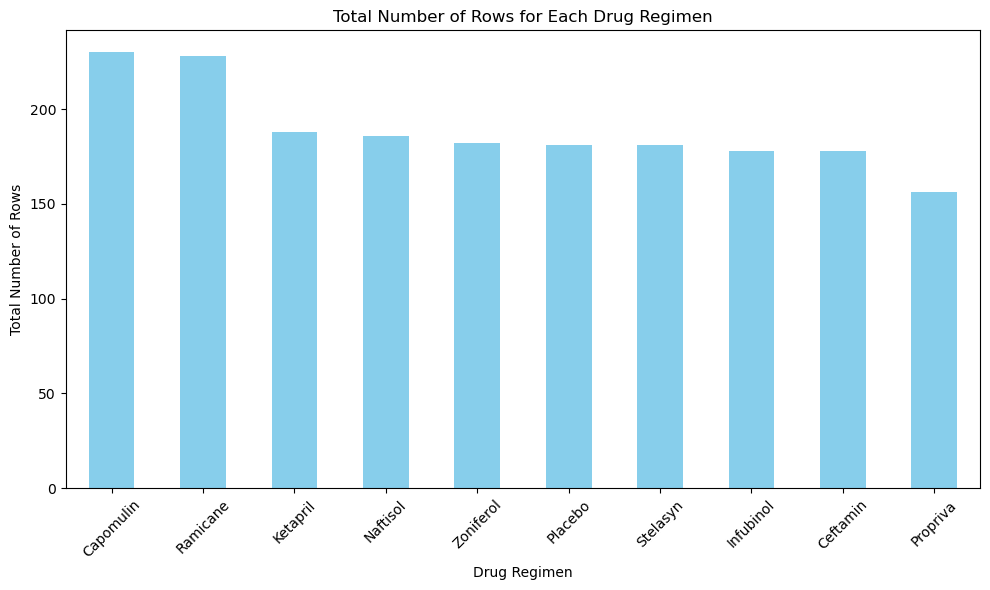

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import pandas as pd

# Counting the number of rows for each drug regimen
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Plotting the bar plot
regimen_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()
plt.show()

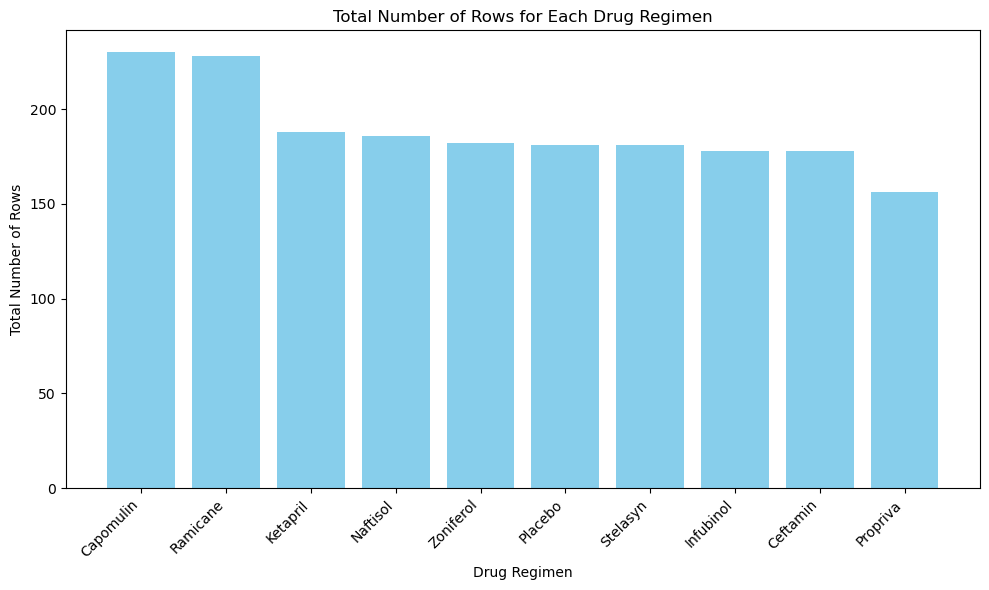

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group the cleaned data by 'Drug Regimen' and count the number of timepoints for each group
import matplotlib.pyplot as plt

# Counting the number of rows for each drug regimen
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Extracting the drug regimens and their corresponding counts
regimens = regimen_counts.index
counts = regimen_counts.values

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(regimens, counts, color='skyblue')

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()

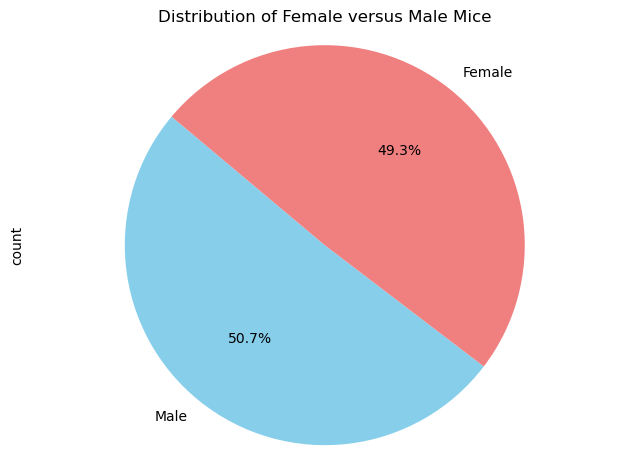

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import pandas as pd
# Counting the number of occurrences of each gender
gender_counts = cleaned_data['Sex'].value_counts()

# Plotting the pie plot
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)

# Adding title
plt.title('Distribution of Female versus Male Mice')

# Displaying the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

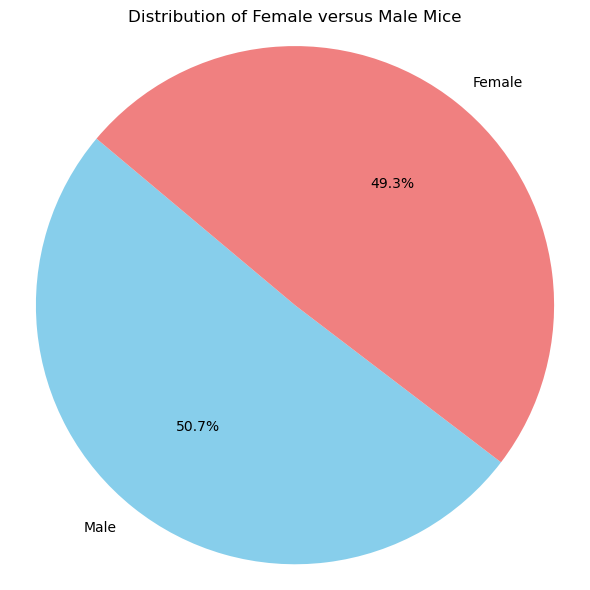

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Counting the number of occurrences of each gender
gender_counts = cleaned_data['Sex'].value_counts()

# Extracting labels and sizes for the pie plot
labels = gender_counts.index
sizes = gender_counts.values

# Colors for each gender
colors = ['skyblue', 'lightcoral']

# Plotting the pie plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Distribution of Female versus Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Displaying the plot
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Step 1: Get the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Step 2: Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'], how='inner')

# Filter the DataFrame to include only the treatment regimens of interest
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]

# Display the DataFrame showing the final tumor volume of each mouse across the specified treatment regimens
final_tumor_volume.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [33]:
# Step 1: Create a DataFrame with the last timepoint for each mouse ID using groupby
last_timepoint_df = final_tumor_volume.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 3: Retrieve the maximum timepoint for each mouse
max_timepoints = last_timepoint_df['Timepoint']

# Step 4: Put the four treatment groups into a list
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 5: Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Step 6: Use a for loop to calculate the IQR and identify potential outliers for each treatment group

for treatment in treatments:
    # Filter the DataFrame for the current treatment
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]
    
    # Get tumor volumes for the current treatment
    tumor_volumes = treatment_data['Tumor Volume (mm3)']
    
    # Add tumor volumes to the list
    tumor_vol_data.append(tumor_volumes)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_volumes.quantile([0.25, 0.75])
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
IQR = Q3 - Q1

# Determine potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


    
    # Locate the rows which contain mice on each drug and get the tumor volumes
# Initialize a dictionary to store tumor volumes for each treatment
tumor_volumes_per_treatment = {}

# Initialize a dictionary to store potential outliers for each treatment
potential_outliers_per_treatment = {}

# Iterate over each treatment
for treatment in treatments:
    
    # Filter the DataFrame for the current treatment
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]

    
    # Store the tumor volumes in the dictionary
    tumor_volumes_per_treatment[treatment] = tumor_volumes
    
# add subset 
# Add subset based on specific conditions
    # For example, you can filter by sex or age
    subset_data = treatment_data  # Placeholder for adding subset conditions

 # Get the tumor volumes for the current treatment and subset
    tumor_volumes = subset_data['Tumor Volume (mm3)']
    
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | 
                              (treatment_data['Tumor Volume (mm3)'] > upper_bound)]
    

    # Store potential outliers in the dictionary
    potential_outliers_per_treatment[treatment] = outliers

    # Display the potential outliers for each treatment
for treatment, outliers in potential_outliers_per_treatment.items():
    print(f"{treatment}'s potential outliers:")
    if outliers.empty:
        print("Series([], Name: Tumor Volume (mm3), dtype: float64)")
    else:
        print(tabulate(outliers, headers='keys', tablefmt='psql'))
    print()

    # Step: Display the interquartile range (IQR) and the outliers for each treatment group
    print(f"Treatment: {treatment}")
    print(f"IQR: {IQR:.2f}")
    
# Display the tumor volumes for each treatment
for treatment, tumor_volumes in tumor_volumes_per_treatment.items():
    print(f"Tumor volumes for {treatment}:")
    print(tabulate(tumor_volumes.to_frame(), headers='keys', tablefmt='psql'))
    print()

Capomulin's potential outliers:
+-----+------------+-------------+----------------+--------+--------------+--------------+----------------------+--------------------+
|     | Mouse ID   |   Timepoint | Drug Regimen   | Sex    |   Age_months |   Weight (g) |   Tumor Volume (mm3) |   Metastatic Sites |
|-----+------------+-------------+----------------+--------+--------------+--------------+----------------------+--------------------|
| 175 | s185       |          45 | Capomulin      | Female |            3 |           17 |              23.3436 |                  1 |
+-----+------------+-------------+----------------+--------+--------------+--------------+----------------------+--------------------+

Treatment: Capomulin
IQR: 15.58
Ramicane's potential outliers:
+----+------------+-------------+----------------+-------+--------------+--------------+----------------------+--------------------+
|    | Mouse ID   |   Timepoint | Drug Regimen   | Sex   |   Age_months |   Weight (g) |   Tumor

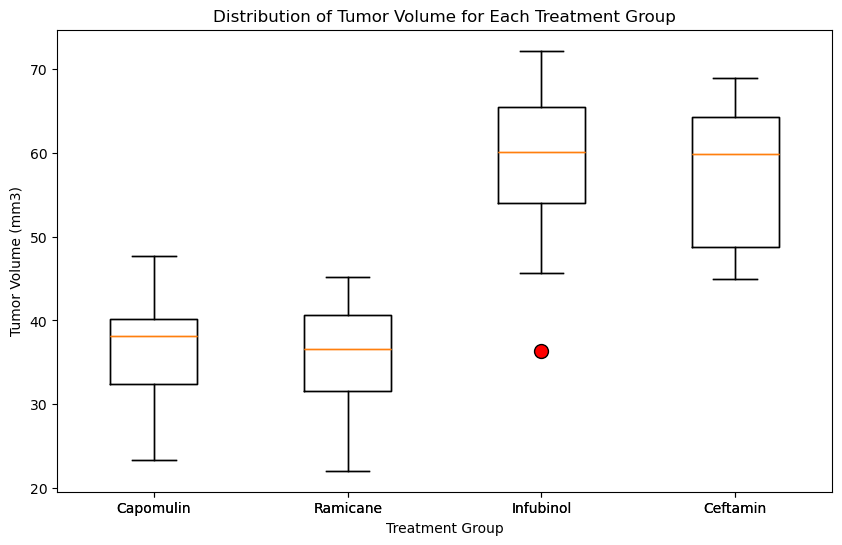

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)

# Create the box plot with red dots for outliers
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=10))

plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(False)  # Turn off gridlines (to turn on grid type 'true' instead)
plt.show()

## Line and Scatter Plots

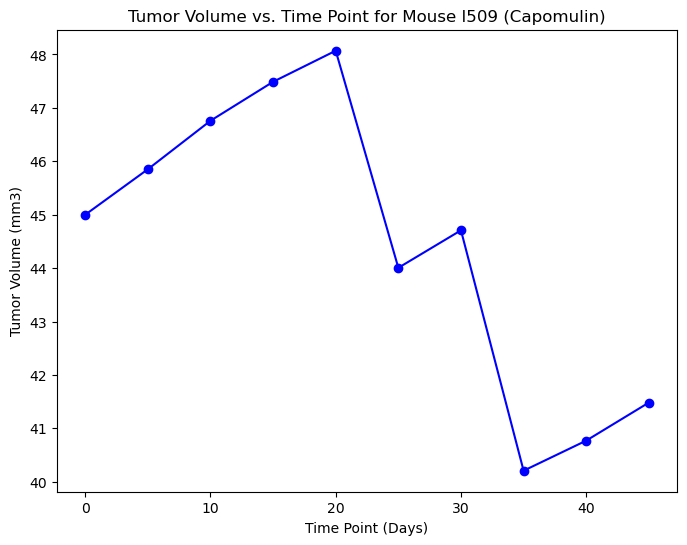

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset containing the tumor volume data for all mice
data = pd.read_csv('data/Study_results.csv')

# Filter the data for Mouse ID 'I509'
mouse_id = 'l509'
mouse_data = data[data['Mouse ID'] == mouse_id]

# Check if mouse_data DataFrame is empty
if mouse_data.empty:
    print(f"No data found for Mouse ID {mouse_id}")
else:
    # Check if there are any values in 'Timepoint' and 'Tumor Volume (mm3)' columns
    if 'Timepoint' not in mouse_data.columns or 'Tumor Volume (mm3)' not in mouse_data.columns:
        print("Required columns not found in mouse_data DataFrame")
    else:
        # Plot tumor volume vs. time point
        plt.figure(figsize=(8, 6))
        plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')
        plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
        plt.xlabel('Time Point (Days)')
        plt.ylabel('Tumor Volume (mm3)')
        plt.grid(False)  # Turn off gridlines
        plt.show()


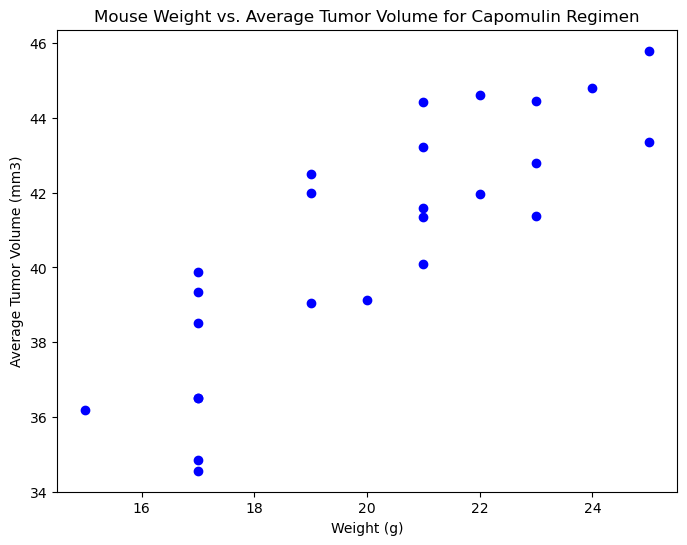

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import pandas as pd
import matplotlib.pyplot as plt

# Merge mouse_metadata and study_results DataFrames on "Mouse ID" using an outer join
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Filter the data for mice treated with Capomulin
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']


# Calculate the weight for each mouse
weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()  # Assuming the weight remains
tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(weight, tumor_volume, color='b', marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(False)  # Turn off gridlines
plt.show()


## Correlation and Regression

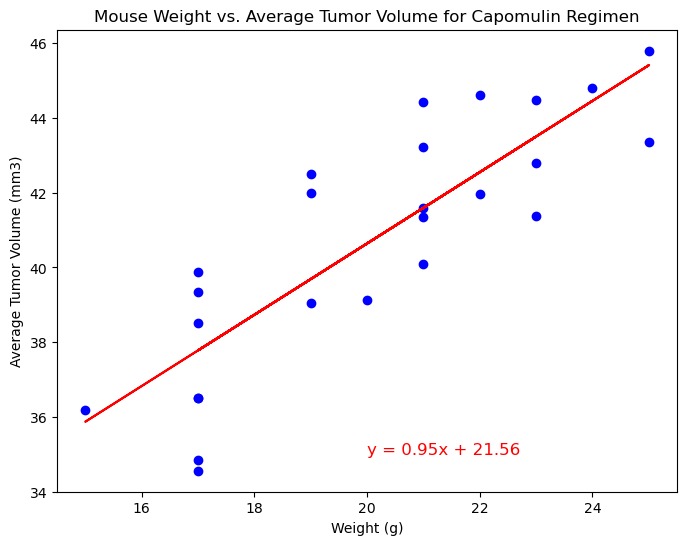

The correlation coefficient between weight and tumor volume is: 0.84
The linear regression model is: y = 0.95x + 21.56


In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter the data for mice treated with Capomulin
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Extract weight and tumor volume data
weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()  # Assuming the weight remains constant for each mouse
tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().round(2) #rounding up the value

# Calculate the correlation coefficient
correlation = weight.corr(tumor_volume)

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create the scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(weight, tumor_volume, color='b', marker='o')
plt.plot(weight, regress_values, "r-")
plt.annotate(line_eq, (20, 35), fontsize=12, color="red")
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(False)
plt.show()

print(f"The correlation coefficient between weight and tumor volume is: {correlation:.2f}")
print(f"The linear regression model is: {line_eq}")